In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

In [24]:
from torch_geometric.data import Data, DataLoader
from torch_geometric.datasets import TUDataset, Planetoid
from torch_geometric.nn import GCNConv, Set2Set, GNNExplainer
import torch_geometric.transforms as T
import torch
import torch.nn.functional as F
import os

import matplotlib.pyplot as plt
from dgl.data import BACommunityDataset
import networkx as nx
import torch_geometric


In [36]:
from src.model import *
from src.data import *
from src.explainer import *
from src.plot import *

In [5]:
train_dataset,data = get_cora_dataset()

In [6]:
epochs = 200
dim = 16

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(num_features=train_dataset.num_features, dim=dim, num_classes=train_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-3)


In [8]:
model = train_model(epochs,model,device,data,optimizer,test_model)

[Train_loss:1.628923 Train_acc: 0.4075, Test_acc: 0.4300]: 100%|█| 200/200 


In [9]:
explainer = GNNExplainer(model, epochs=200)

In [10]:
node_feature_mask, edge_mask = explain_model(explainer,data,10)

Explain node 10: 100%|██████████████████| 200/200 [00:00<00:00, 831.50it/s]


In [11]:
hook_handle, activations = add_hook_model(model,"conv2")

In [12]:
with torch.no_grad():
    model.eval()
    model(data.x, data.edge_index, data)

In [13]:
hook_handle.remove()

In [14]:
kmeans,activations_numpy = cluster_activations(activations,num_clusters=4)

/rds/user/njr61/hpc-work/anaconda3/envs/gnn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


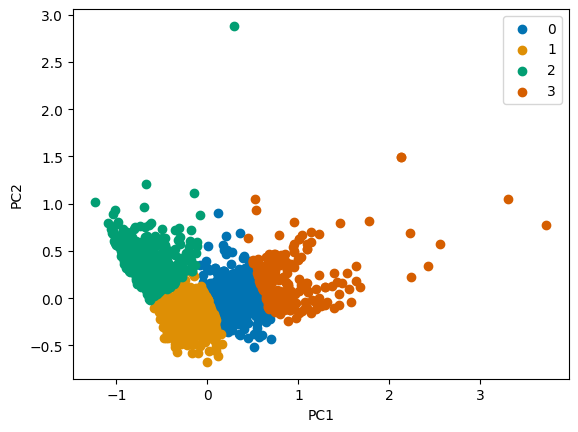

In [15]:
plot_kmeans_clusters(kmeans,activations_numpy)

In [16]:
kmeans

KMeans(n_clusters=4)

In [17]:
simple_conv = SimpleConv(16)

In [34]:
cdm = CDM(simple_conv,8,16,16)

In [39]:
simple_conv(data.x,data.edge_index)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2708x1433 and 16x16)

In [37]:
concepts, _ = cdm(data.x,data.edge_index)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2708x1433 and 16x16)

In [ ]:
plot_subgraph(data,node_feature_mask,edge_mask)